<h1>Load Tokenizer and Instantiate Model</h1>

In [1]:
from rnn_module import RNNModule
import torch
import sentencepiece as spm
from transformers import BertTokenizer  # Or any other tokenizer you prefer

# Trained tokenizer
sp = spm.SentencePieceProcessor()
model_prefix = "bpe_tokenizer"
sp.load(f'{model_prefix}.model')
tokenizer = sp

device = "mps"

<h1>Instantiate New Model</h1>

Uncomment the code below to train a new model

In [2]:
# rnn_model = RNNModule(tokenizer.get_piece_size())
# rnn_model.to(device)

<h1>Load Model</h1>

Uncomment the code below to use the pre-existing model parameters

In [3]:
import torch
import sentencepiece as spm
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_NAME = "rnn_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

rnn_model = RNNModule(sp.get_piece_size()).to("mps")

# Load the saved state_dict of module_0 
rnn_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

<h1>Train model</h1>

In [4]:
from textdataset import TextDataSet
import os

training_losses, validation_losses = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).train_model(rnn_model)

Epoch 1, Training Loss: 4.7718 | Validation loss: 4.6917
Epoch 2, Training Loss: 4.7535 | Validation loss: 4.6965
Epoch 3, Training Loss: 4.7418 | Validation loss: 4.7000

Train time: 108.836 seconds


<h1>Visualize</h1>

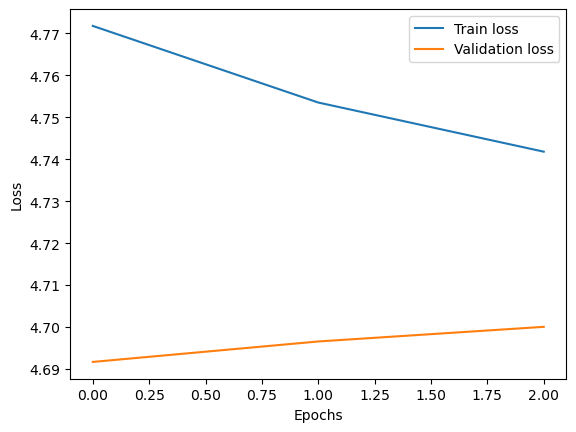

In [5]:
import matplotlib.pyplot as plt
# plot the loss curves
plt.plot(training_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

<h1>Save model</h1>

In [6]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "rnn_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=rnn_model.state_dict(),f=MODEL_SAVE_PATH)
print("saving complete")

saving complete


<h1>Evaluate model</h1>

In [7]:
from textdataset import TextDataSet
import os

tds = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).evalutate_model(rnn_model)

Perplexity: 137.7003936767578 | Bleu score: 0.005967885492333538


<h1>Generate from prompts</h1>

In [9]:
# Example usage of the generate method
prompt = "Do you prefer pizza or hamburgers?"
generated_text = rnn_model.generate(sp, prompt, max_length=50, eos_token_id=2, temperature=0.8, device="mps")
print(f"Generated text: {generated_text}")

Generated text: No thousand rubles on the coming to get our ship on his disvolution! said: Sohriilry influence, with the neighborhood you will decide and turning out of my lips, perhaps not begin to our promise: We saw a quarter. Oh
